# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_ELAIS-S1.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J003311.854-452559.212,8.2993897334,-45.4331144811,0.450399,0.977947,0.12883,2.09874,4.59032,0.576573,0.474958,1.05739,0.130137,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,0.999178,0.999998,1.00078,2000.0,2000.0,2000.0,0.0,0.88,0.0
HELP_J003311.199-452603.296,8.2966614384,-45.4342490173,0.365059,0.830561,0.100193,2.74187,5.86956,0.796514,0.565348,1.25256,0.15239,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,1.00029,0.999765,0.999787,2000.0,2000.0,2000.0,0.0,0.916,0.0
HELP_J003315.424-452615.143,8.31426712989,-45.4375397927,0.506888,0.956509,0.156435,5.53983,7.75451,3.43218,0.870189,1.47314,0.329209,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,1.00237,0.998901,1.00182,2000.0,2000.0,2000.0,0.0,0.98,0.0
HELP_J003314.599-452546.572,8.31082943334,-45.4296033101,13.2777,20.3411,6.13118,5.48241,10.7545,1.70868,0.844795,1.83249,0.232363,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,0.999851,0.998459,0.999741,2000.0,2000.0,2000.0,0.0,0.822,0.0
HELP_J003306.225-452506.589,8.27593562562,-45.4184968362,4.11085,8.43708,1.33027,5.6115,10.275,1.89347,1.64713,4.1774,0.448624,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,0.999034,0.999552,0.99866,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J003304.883-452634.388,8.27034568672,-45.4428854649,0.675735,1.44969,0.191177,2.75811,5.58891,0.908916,0.709724,1.39615,0.211839,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,1.002,0.998432,1.00107,2000.0,2000.0,2000.0,0.0,0.762,0.0
HELP_J003304.125-452627.612,8.26718894541,-45.4410033252,0.92019,1.76548,0.265045,3.47432,7.05959,1.05016,0.800876,1.44064,0.246312,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,0.998654,0.998637,1.00206,2000.0,2000.0,2000.0,0.0,0.831,0.0
HELP_J003310.155-452508.483,8.29231242172,-45.4190229197,6.49534,13.2528,1.97831,3.62868,8.40379,0.997958,1.03611,2.45399,0.257982,-0.23035,-3.79216,-0.923999,0.0523492,3.87586,0.148789,1.00093,0.998878,0.999587,2000.0,2000.0,2000.0,0.0,0.194,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

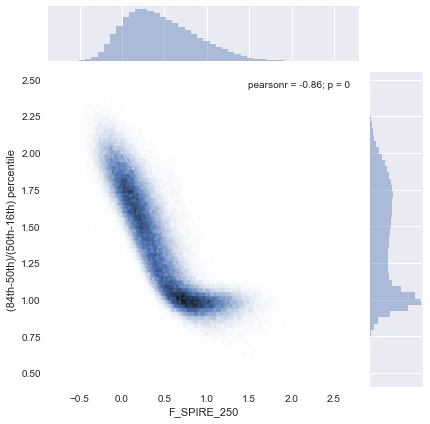

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

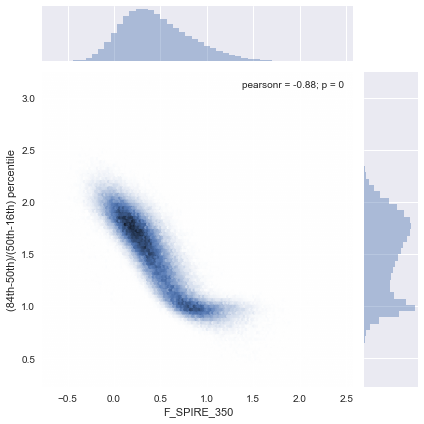

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

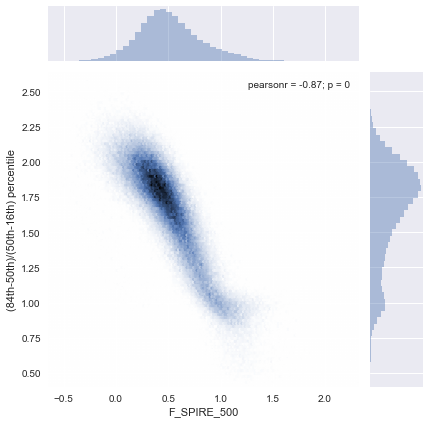

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))



In [8]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [9]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

135144 140440 162433 194276


In [10]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True


In [11]:
cat.write('./data/dmu26_XID+SPIRE_ELAIS-S1_20180327.fits', format='fits',overwrite=True)
